# 测试计算尖峰序列的信息熵 entropy 和两个序列的互信息 mutual information

In [29]:
import os
import sys
sys.path.append(r"../")
import numpy as np
import matplotlib.pyplot as plt
# from nodes.HR import HR
from nodes.HH import HH
from connect.ws_small_world import create_sw
from synapse.synapse import synbase
from utils.statistics import cal_cv, cal_synFactor, cal_kop, cal_information
from utils.utils import spikevent
from utils.utils_plot import plot_firing_raster

In [30]:
seed = 0
np.random.seed(seed)                # 给numpy设置随机种子

In [31]:
N = 100
dt = 0.01
pre = HH(N=N)
post = pre
# post = HH(N=N)

In [32]:
Num = int(N)
conn = create_sw(Num, 2, 0.5)
syn = synbase(pre, post, conn=conn, synType="electr")   # ["electr", "chem_Alpha"]

In [33]:
# 初始化神经元
for i in range(10000):
    pre()
    # post()

In [34]:
syn.w = .08

In [35]:
# 初始化网络
for i in range(10000):
    syn()

In [36]:
Tn = 100000
cal_info = cal_information(syn.t, syn.t+Tn*dt, bin_size=14)

In [37]:
time = []
mem = []
for i in range(Tn):
    # 使用泊松过程测试CV
    # pre.Iex=0 
    # pre.Iex=(np.random.rand(N)<0.1).astype(float)*100
    syn()
    cal_info(pre.flaglaunch, syn.t)
    time.append(syn.t)
    mem.append(syn.post.mem.copy())

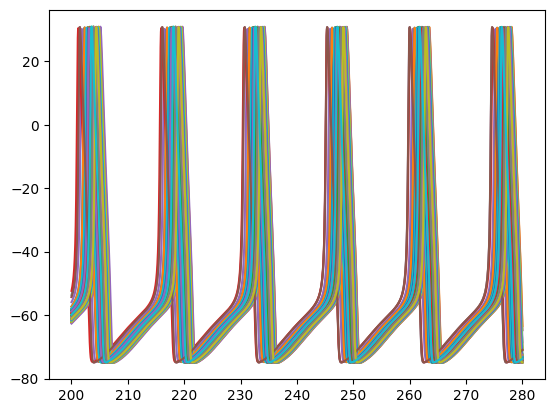

In [38]:
plt.plot(time[0:8000], mem[0:8000])
plt.show()

In [39]:
entropy, MI = cal_info.return_info()

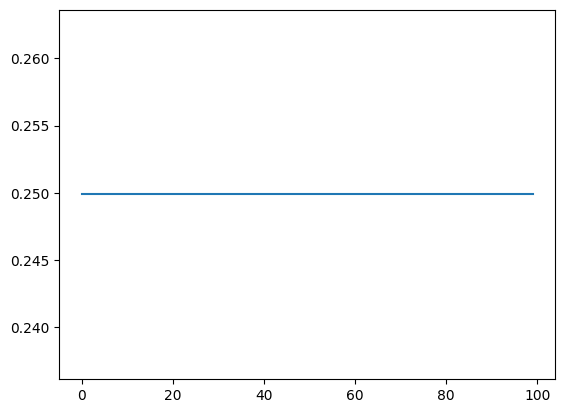

In [40]:
plt.plot(entropy)

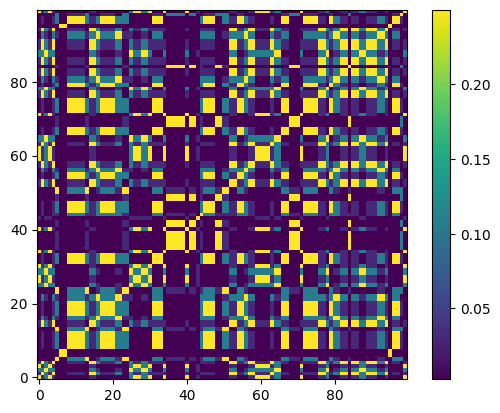

In [41]:
plt.imshow(MI, origin="lower")
plt.colorbar()

In [42]:
print(entropy)
print(MI[0,0])

[0.24988229283030006, 0.24988229283030006, 0.24988229283030006, 0.24988229283030006, 0.24988229283030006, 0.24988229283030006, 0.24988229283030006, 0.24988229283030006, 0.24988229283030006, 0.24988229283030006, 0.24988229283030006, 0.24988229283030006, 0.24988229283030006, 0.24988229283030006, 0.24988229283030006, 0.24988229283030006, 0.24988229283030006, 0.24988229283030006, 0.24988229283030006, 0.24988229283030006, 0.24988229283030006, 0.24988229283030006, 0.24988229283030006, 0.24988229283030006, 0.24988229283030006, 0.24988229283030006, 0.24988229283030006, 0.24988229283030006, 0.24988229283030006, 0.24988229283030006, 0.24988229283030006, 0.24988229283030006, 0.24988229283030006, 0.24988229283030006, 0.24988229283030006, 0.24988229283030006, 0.24988229283030006, 0.24988229283030006, 0.24988229283030006, 0.24988229283030006, 0.24988229283030006, 0.24988229283030006, 0.24988229283030006, 0.24988229283030006, 0.24988229283030006, 0.24988229283030006, 0.24988229283030006, 0.2498822928